In [1]:
import os
from PIL import Image, ImageFilter

In [2]:
base_name = "image"
image_extension = "png"

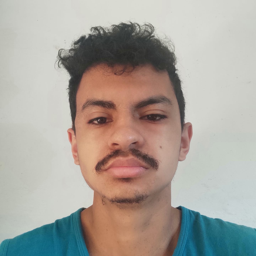

In [3]:
imagem = Image.open(f"../img/{base_name}.{image_extension}")

#MOSTAR IMAGEM EM TAMANHO REDUZIDO
imagem.thumbnail((256, 256))
display(imagem)

In [4]:
#PEGA A COR DO PIXEL SELECIONADO NA IMAGEM
print(imagem.getpixel((255,255)))

(28, 115, 135)


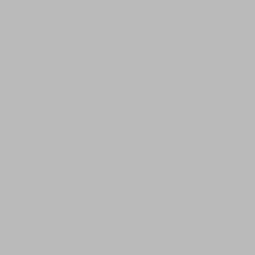

In [5]:
size = 255
cor = '#bababa'
imagem2 = Image.new("RGB", (size, size), cor)
display(imagem2)

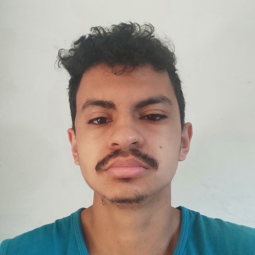

In [6]:
size = 255
cor = '#bababa'

nova_imagem = Image.new("RGB", (size, size), cor)

for x in range(size):
    for y in range(size):
        cor_pixel = imagem.getpixel((x,y))
        nova_imagem.putpixel((x ,y), cor_pixel)
display(nova_imagem)

---
## AGRUPANDO PIXELS
<br>


$    \left[  \begin{array}{col_1 col_2 col_3}
        (1-1) & (1-2) & (1-3)\\
        (2-1) & (2-2) & (2-3)\\
        (3-1) & (3-2) & (3-3)\\
        \end{array} \right] $$    \left[  \begin{array}{col_1 col_2 col_3}
        (1-4) & (1-5) & (1-6)\\
        (2-4) & (2-5) & (2-6)\\
        (3-4) & (3-5) & (3-6)\\
        \end{array} \right] $
<br>
$    \left[  \begin{array}{col_1 col_2 col_3}
        (4-1) & (4-2) & (4-3)\\
        (5-1) & (5-2) & (5-3)\\
        (6-1) & (6-2) & (6-3)\\
        \end{array} \right] $$    \left[  \begin{array}{col_1 col_2 col_3}
        (4-4) & (4-5) & (4-6)\\
        (5-4) & (5-5) & (5-6)\\
        (6-4) & (6-5) & (6-6)\\
        \end{array} \right] $  

---

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imshow, imread, imsave
from skimage.transform import downscale_local_mean

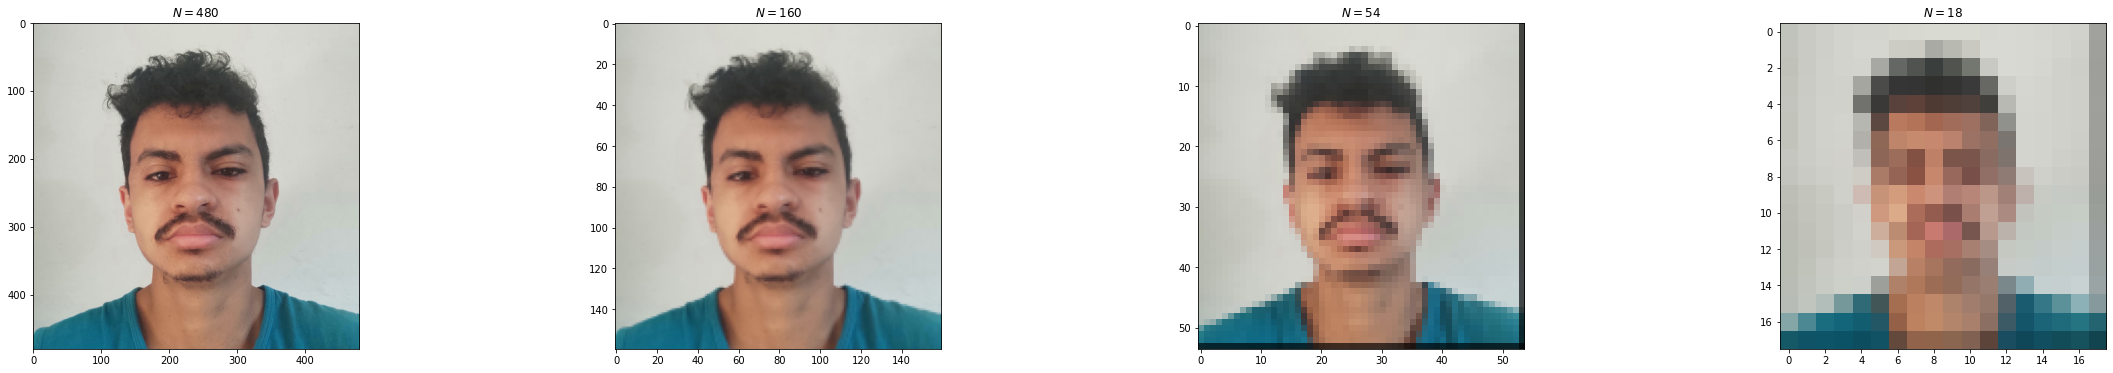

In [8]:
process_image = imread('../img/image.png')

factors = 3**np.arange(1, 5)
figure, axis = plt.subplots(1, len(factors), figsize=(40, 6))

for factor, ax in zip(factors, axis):
    image = downscale_local_mean(process_image, factors=(factor, factor, 1)).astype(int)
    
    ax.imshow(image)
    ax.set_title('$N={}$'.format(image.shape[0]))

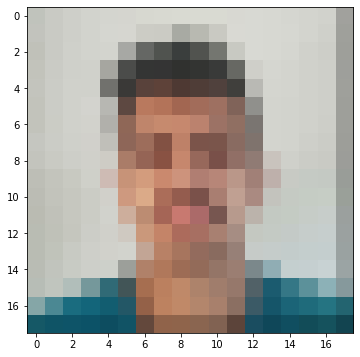

In [10]:
from skimage import img_as_ubyte

process_image = imread('../img/image.png')

figure, axis = plt.subplots(1, 1, figsize=(40, 6))
image = downscale_local_mean(process_image, (81, 81, 1)).astype(int)

axis.imshow(image)
imsave(('../img/output.png'), img_as_ubyte(image))